### 1. Load the required libraries and read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats 
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'C:\Users\udhay\Downloads\renttherunway.csv')
df.head(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [3]:
df.shape

(192544, 16)

In [4]:
df.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

### 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [6]:
df.duplicated().sum()

0

### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)

In [7]:
df = df.drop(columns=['user_id','item_id','review_text','review_summary','review_date'],axis=1)

In [8]:
df.head(5)

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float.

In [9]:
df['weight'] = df['weight'].str.replace('lbs', '')

In [10]:
df['weight'] = pd.to_numeric(df['weight'])

In [11]:
df['weight']

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. 

In [12]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [13]:
df['rented for'] = df['rented for'].replace(['party: cocktail'],'party')

In [14]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype

In [15]:
df['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [16]:
df['height']= df['height'].str.replace("' ",'.')

In [17]:
df['height']=df['height'].str.replace('"',' ')

In [18]:
df['height']= pd.to_numeric(df['height'])

In [19]:
df['height']=df['height']*12

In [20]:
df['height']

0         69.6
1         67.2
2         64.8
3         66.0
4         70.8
          ... 
192539    70.8
192540    61.2
192541    69.6
192542    67.2
192543    67.2
Name: height, Length: 192544, dtype: float64

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods

In [21]:
df.isnull().sum()

Unnamed: 0        0
fit               0
bust size     18411
weight        29982
rating           82
rented for       10
body type     14637
category          0
height          677
size              0
age             960
dtype: int64

In [22]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))


In [23]:
df.isnull().sum()

Unnamed: 0    0
fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

In [24]:
df.head(5)

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,137.0,10.0,vacation,hourglass,romper,69.6,14,28.0
1,1,fit,34b,132.0,10.0,other,straight & narrow,gown,67.2,12,36.0
2,2,fit,34b,130.0,10.0,party,hourglass,sheath,64.8,4,116.0
3,3,fit,34c,135.0,8.0,formal affair,pear,dress,66.0,8,34.0
4,4,fit,34b,145.0,10.0,wedding,athletic,gown,70.8,12,27.0


### 9. Check the statistical summary for the numerical and categorical columns and write your findings. 

In [25]:
df.describe()

,Unnamed: 0,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,96271.500000,136.240709,9.092758,65.698135,12.245175,33.856703
std,55582.809453,20.300468,1.429862,3.209291,8.494877,8.040513
min,0.000000,50.000000,2.000000,49.200000,0.000000,0.000000
25%,48135.750000,125.000000,8.000000,63.600000,8.000000,29.000000
50%,96271.500000,130.000000,10.000000,66.000000,12.000000,32.000000
75%,144407.250000,145.000000,10.000000,68.400000,16.000000,37.000000
max,192543.000000,300.000000,10.000000,79.200000,58.000000,117.000000


In [26]:
df.describe(include='object')


,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,142058,45696,57794,69986,92884


In [27]:
##it shows posibility of outliers in weight , size and age. 

### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

<Axes: >

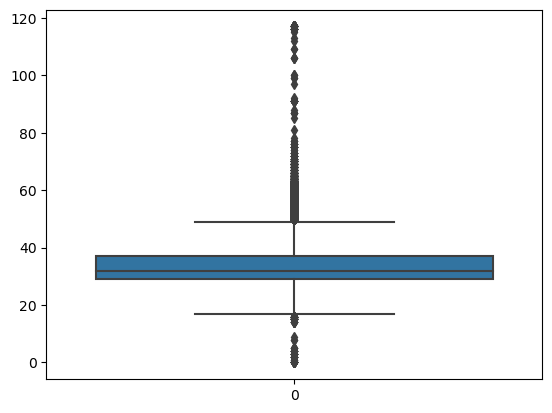

In [28]:
sns.boxplot(df['age'])

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

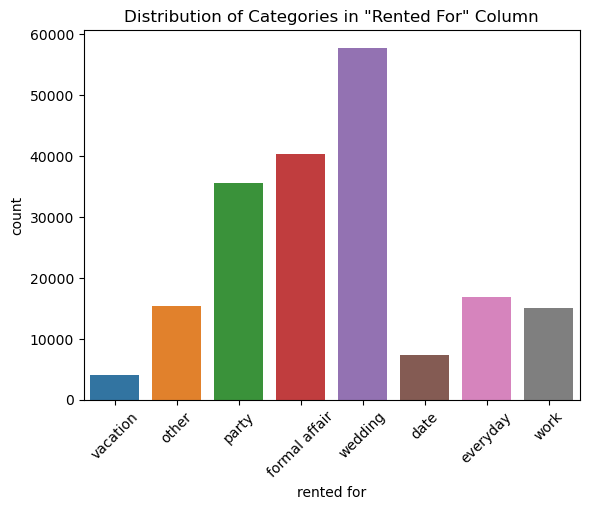

In [29]:
sns.countplot(x='rented for', data=df)
plt.title('Distribution of Categories in "Rented For" Column')
plt.xticks(rotation=45)  # Rotates the category labels for better readability
plt.show()

### 12. Encode the categorical variables in the dataset

In [30]:
cate= ['fit','bust size','rented for','body type','category']
lbl_encoder = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encoder.fit_transform)
    
df.head(3)

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,0,39,137.0,10.0,5,3,44,69.6,14,28.0
1,1,0,37,132.0,10.0,3,6,20,67.2,12,36.0
2,2,0,37,130.0,10.0,4,3,45,64.8,4,116.0


### 13. Standardize the data, so that the values are within a particular range.

In [31]:
df1 = df.copy()
standardizer_col = StandardScaler().fit_transform(df1.values)
standardizer_col_df = pd.DataFrame(standardizer_col, index=df1.index , columns=df1.columns)
standardizer_col_df.head(3)

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-1.732042,-0.556291,-0.00464,0.037403,0.634498,0.514420,0.020953,1.569310,1.215806,0.206575,-0.728401
1,-1.732024,-0.556291,-0.18721,-0.208898,0.634498,-0.456753,1.927582,-0.307247,0.467975,-0.028862,0.266563
2,-1.732006,-0.556291,-0.18721,-0.307418,0.634498,0.028833,0.020953,1.647500,-0.279855,-0.970608,10.216203


### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same

Text(0, 0.5, 'Explained variance ratio')

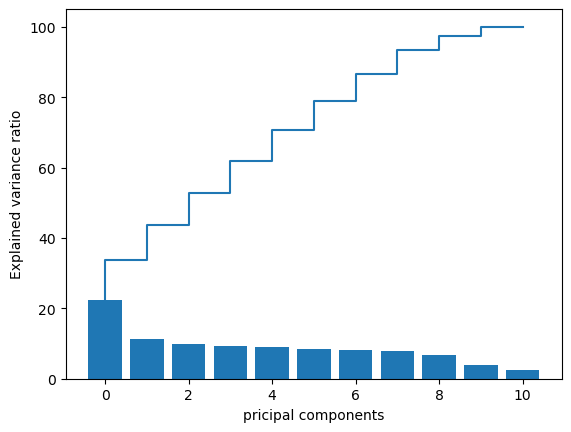

In [32]:
##covarience matrix
cov_matrix = np.cov(standardizer_col.T)

##Eigen values and Eigen vectors
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)

##screen plot
total= sum(eig_vals)
var_exp =[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

##Diagram
plt.bar(range(11),var_exp)
plt.step(range(11),cum_var_exp)
plt.xlabel("pricipal components")
plt.ylabel("Explained variance ratio")

### 15.Apply K-means clustering and segment the data. (You may use original data or PCA transformed data

In [33]:
pca = PCA(n_components=8)
pca_df = pd.DataFrame(pca.fit_transform(standardizer_col_df),columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,0.194976,-0.898230,0.138259,-1.391106,-1.814997,1.313655,-0.028474,-0.754075
1,-0.649837,-0.723655,0.480066,0.475315,-1.705696,-0.753402,-0.453522,-1.729245
2,0.609737,0.276534,5.925945,4.312009,-1.436370,0.340622,7.053169,-1.619015
3,-0.502747,0.172057,0.359177,0.071932,-1.684493,-1.188327,-0.223726,-0.356384
4,0.589349,-1.243195,-1.502474,-1.305903,-1.776266,0.274048,0.850490,0.113693


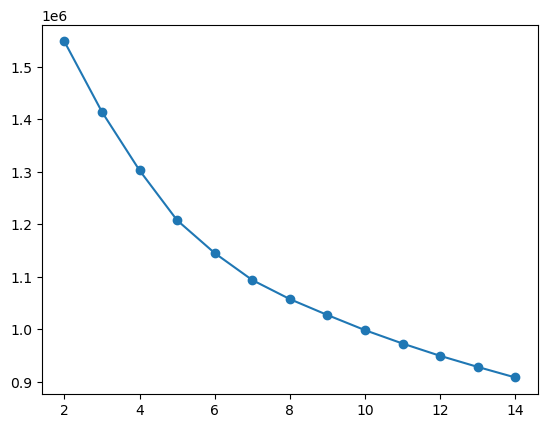

In [36]:
#Find optimal k using elbow plot
cluster_errors = []
cluster_range = range(2,15)

for num_clusters in cluster_range:
    cluster= KMeans(num_clusters,random_state=100)
    cluster.fit(pca_df)
    cluster_errors.append(cluster.inertia_)
    
cluster_df= pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o')

In [38]:
#Apply Kmeans
kmeans = KMeans(n_clusters=3,random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [39]:
#Check the cluster labels
label = pd.DataFrame(kmeans.labels_,columns=['Label'])
kmeans_df = pca_df.join(label)
kmeans_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,Label
0,0.194976,-0.898230,0.138259,-1.391106,-1.814997,1.313655,-0.028474,-0.754075,1
1,-0.649837,-0.723655,0.480066,0.475315,-1.705696,-0.753402,-0.453522,-1.729245,1
2,0.609737,0.276534,5.925945,4.312009,-1.436370,0.340622,7.053169,-1.619015,2
3,-0.502747,0.172057,0.359177,0.071932,-1.684493,-1.188327,-0.223726,-0.356384,1
4,0.589349,-1.243195,-1.502474,-1.305903,-1.776266,0.274048,0.850490,0.113693,1


In [41]:
kmeans_df['Label'].value_counts()

Label
1    102335
2     52897
0     37312
Name: count, dtype: int64

<Axes: xlabel='pc1', ylabel='pc2'>

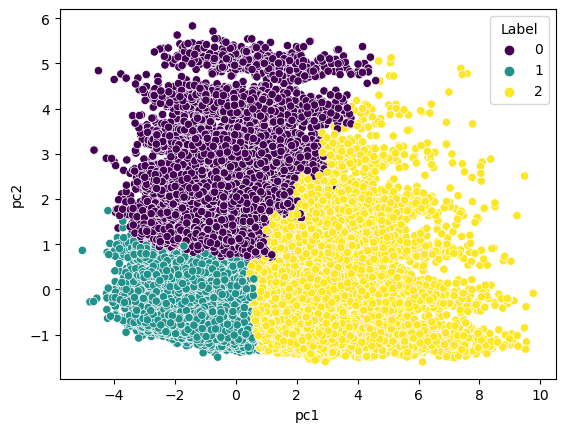

In [44]:
sns.scatterplot(data=kmeans_df,x='pc1',y='pc2',hue='Label',palette='viridis')

###  Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) 
### a. Find the optimal K Value using dendrogram for Agglomerative clustering.
### b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.
### c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique.

In [46]:
merg = linkage(standardizer_col,method='ward')
dendrogram(merg, leaf_rotation = 90,)
plt.show()

MemoryError: Unable to allocate 138. GiB for an array with shape (18536499696,) and data type float64